In [1]:
import os

print(os.listdir("/kaggle/input/c02-emission"))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


FileNotFoundError: [WinError 3] The system cannot find the path specified: '/kaggle/input/c02-emission'

In [ ]:

df1=pd.read_csv("/kaggle/input/c02-emission/annual-co2-emissions-per-country.csv")
df2=pd.read_csv("/kaggle/input/gdp-and-co2/co2-emissions-and-gdp.csv")
df3=pd.read_csv("/kaggle/input/population-and-energy/electricity-generation.csv")
df4=pd.read_csv("/kaggle/input/population-and-energy/primary-energy-cons.csv")
df5=pd.read_csv("/kaggle/input/population-and-energy/population.csv")
print(df1.head())
print(df2.head())
print(df3.head())
print(df4.head())
print(df5.head())

        Entity Code  Year  Annual CO₂ emissions
0  Afghanistan  AFG  1949               14656.0
1  Afghanistan  AFG  1950               84272.0
2  Afghanistan  AFG  1951               91600.0
3  Afghanistan  AFG  1952               91600.0
4  Afghanistan  AFG  1953              106256.0
        Entity Code  Year  GDP, PPP (constant 2017 international $)  \
0  Afghanistan  AFG  1990                                       NaN   
1  Afghanistan  AFG  1991                                       NaN   
2  Afghanistan  AFG  1992                                       NaN   
3  Afghanistan  AFG  1993                                       NaN   
4  Afghanistan  AFG  1994                                       NaN   

   Annual CO₂ emissions  Annual consumption-based CO₂ emissions  
0             2024326.1                                     NaN  
1             1914301.0                                     NaN  
2             1482054.0                                     NaN  
3             1486943

In [ ]:
print("Dataset Description:")
print(df.describe())

print("\nDataset Information:")
print(df.info())


Dataset Description:
              Year  GDP, PPP (constant 2017 international $)    Population  \
count  5342.000000                              4.809000e+03  5.342000e+03   
mean   2008.289030                              5.880868e+11  3.955272e+07   
std       8.402282                              1.862721e+12  1.421692e+08   
min    1990.000000                              4.330430e+07  1.776000e+03   
25%    2002.000000                              2.203118e+10  1.980963e+06   
50%    2009.000000                              8.919151e+10  8.299824e+06   
75%    2015.000000                              3.905231e+11  2.746442e+07   
max    2022.000000                              2.568441e+13  1.426437e+09   

       Annual CO₂ emissions_y  Annual consumption-based CO₂ emissions  \
count            5.342000e+03                            3.392000e+03   
mean             1.801851e+08                            2.664130e+08   
std              7.507688e+08                            

In [ ]:
#all null valued rows are deleted here
df1=df1.dropna(how='all')
df2=df2.dropna(how='all')
df3=df3.dropna(how='all')
df4=df4.dropna(how='all')
df5=df5.dropna(how='all')
print(df1.head())
num_rows = df1.shape[0]
print("Number of rows:", num_rows)

        Entity Code  Year  Annual CO₂ emissions
0  Afghanistan  AFG  1949               14656.0
1  Afghanistan  AFG  1950               84272.0
2  Afghanistan  AFG  1951               91600.0
3  Afghanistan  AFG  1952               91600.0
4  Afghanistan  AFG  1953              106256.0
Number of rows: 30308


In [ ]:
merged_df12=pd.merge(df1 , df2 , on=['Entity','Year'],how='inner')
merged_df123=pd.merge(merged_df12,df3,on=['Entity','Year'],how='inner')


merged_df123=merged_df123.drop(['Code_x','Code_y'],axis=1)


print(merged_df123.head())
num_rows = merged_df123.shape[0]
print("Number of rows:", num_rows)

        Entity  Year  Annual CO₂ emissions_x  \
0  Afghanistan  2000              1047127.94   
1  Afghanistan  2001              1069098.00   
2  Afghanistan  2002              1340995.00   
3  Afghanistan  2003              1559602.00   
4  Afghanistan  2004              1237247.00   

   GDP, PPP (constant 2017 international $)  Annual CO₂ emissions_y  \
0                                       NaN              1047127.94   
1                                       NaN              1069098.00   
2                              2.689005e+10              1340995.00   
3                              2.926506e+10              1559602.00   
4                              2.967890e+10              1237247.00   

   Annual consumption-based CO₂ emissions Code  Electricity generation - TWh  
0                                     NaN  AFG                          0.48  
1                                     NaN  AFG                          0.69  
2                                     NaN  AFG 

In [ ]:
merged_df1234=pd.merge(merged_df123,df4,on=['Entity','Year'],how='inner')
print(merged_df1234.head())

        Entity  Year  Annual CO₂ emissions_x  \
0  Afghanistan  2000              1047127.94   
1  Afghanistan  2001              1069098.00   
2  Afghanistan  2002              1340995.00   
3  Afghanistan  2003              1559602.00   
4  Afghanistan  2004              1237247.00   

   GDP, PPP (constant 2017 international $)  Annual CO₂ emissions_y  \
0                                       NaN              1047127.94   
1                                       NaN              1069098.00   
2                              2.689005e+10              1340995.00   
3                              2.926506e+10              1559602.00   
4                              2.967890e+10              1237247.00   

   Annual consumption-based CO₂ emissions Code_x  \
0                                     NaN    AFG   
1                                     NaN    AFG   
2                                     NaN    AFG   
3                                     NaN    AFG   
4                       

In [ ]:
merged_df12345=pd.merge(merged_df1234,df5,on=['Entity','Year'],how='inner')
df=merged_df12345.drop(['Annual CO₂ emissions_x'],axis=1)
print(df.columns)
print(df.head())
num_rows = df.shape[0]
print("Number of rows:", num_rows)

Index(['Entity', 'Year', 'GDP, PPP (constant 2017 international $)',
       'Annual CO₂ emissions_y', 'Annual consumption-based CO₂ emissions',
       'Code_x', 'Electricity generation - TWh', 'Code_y',
       'Primary energy consumption (TWh)', 'Code', 'Population (historical)'],
      dtype='object')
        Entity  Year  GDP, PPP (constant 2017 international $)  \
0  Afghanistan  2000                                       NaN   
1  Afghanistan  2001                                       NaN   
2  Afghanistan  2002                              2.689005e+10   
3  Afghanistan  2003                              2.926506e+10   
4  Afghanistan  2004                              2.967890e+10   

   Annual CO₂ emissions_y  Annual consumption-based CO₂ emissions Code_x  \
0              1047127.94                                     NaN    AFG   
1              1069098.00                                     NaN    AFG   
2              1340995.00                                     NaN    AF

In [ ]:
print(df.columns)
new_order=['Code','Entity','Year','GDP, PPP (constant 2017 international $)','Population (historical)','Annual CO₂ emissions_y', 'Annual consumption-based CO₂ emissions',
       'Electricity generation - TWh', 'Primary energy consumption (TWh)']
df=df[new_order]
print(df.columns)
print(df.head())

Index(['Entity', 'Year', 'GDP, PPP (constant 2017 international $)',
       'Annual CO₂ emissions_y', 'Annual consumption-based CO₂ emissions',
       'Code_x', 'Electricity generation - TWh', 'Code_y',
       'Primary energy consumption (TWh)', 'Code', 'Population (historical)'],
      dtype='object')
Index(['Code', 'Entity', 'Year', 'GDP, PPP (constant 2017 international $)',
       'Population (historical)', 'Annual CO₂ emissions_y',
       'Annual consumption-based CO₂ emissions',
       'Electricity generation - TWh', 'Primary energy consumption (TWh)'],
      dtype='object')
  Code       Entity  Year  GDP, PPP (constant 2017 international $)  \
0  AFG  Afghanistan  2000                                       NaN   
1  AFG  Afghanistan  2001                                       NaN   
2  AFG  Afghanistan  2002                              2.689005e+10   
3  AFG  Afghanistan  2003                              2.926506e+10   
4  AFG  Afghanistan  2004                              2.

In [ ]:

df=df.rename(columns={'Entity': 'Country','Population (historical)':'Population'})
print(df.head())

  Code      Country  Year  GDP, PPP (constant 2017 international $)  \
0  AFG  Afghanistan  2000                                       NaN   
1  AFG  Afghanistan  2001                                       NaN   
2  AFG  Afghanistan  2002                              2.689005e+10   
3  AFG  Afghanistan  2003                              2.926506e+10   
4  AFG  Afghanistan  2004                              2.967890e+10   

   Population  Annual CO₂ emissions_y  Annual consumption-based CO₂ emissions  \
0    20130334              1047127.94                                     NaN   
1    20284303              1069098.00                                     NaN   
2    21378123              1340995.00                                     NaN   
3    22733054              1559602.00                                     NaN   
4    23560656              1237247.00                                     NaN   

   Electricity generation - TWh  Primary energy consumption (TWh)  
0                 

In [ ]:
df = df[df['Country'] != 'Asia']
df = df[df['Country'] != 'Africa']
df = df[df['Country'] != 'Europe']
df = df[df['Country'] != 'European Union (27)']
df = df[df['Country'] != 'North America']
df = df[df['Country'] != 'South America']
df = df[df['Country'] != 'Lower-middle-income countries']
df = df[df['Country'] != 'High-income countries']
df = df[df['Country'] != 'World']

In [ ]:


# Get the number of rows
num_rows = df.shape[0]
print("Number of rows:", num_rows)

# Get the number of columns
num_cols = df.shape[1]
print("Number of columns:", num_cols)

Number of rows: 5342
Number of columns: 9


In [ ]:

# Calculate mean
mean_value = df['Annual CO₂ emissions_y'].mean()

# Calculate approximate median
median_value = df['Annual CO₂ emissions_y'].median()

# Calculate variance
variance_value = df['Annual CO₂ emissions_y'].var()


print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Variance: {variance_value}")

Mean: 180185134.79646948
Median: 17382433.0
Variance: 5.6365378352496435e+17


In [ ]:
# Calculate mean
mean_value = df['GDP, PPP (constant 2017 international $)'].mean()

# Calculate approximate median
median_value = df['GDP, PPP (constant 2017 international $)'].median()

# Calculate variance
variance_value = df['GDP, PPP (constant 2017 international $)'].var()


print(f"Mean: {mean_value}")
print(f"Approximate Median: {median_value}")
print(f"Variance: {variance_value}")

Mean: 588086849429.6302
Approximate Median: 89191510000.0
Variance: 3.469729508856001e+24


In [ ]:
# Calculate mean
mean_value = df['Annual consumption-based CO₂ emissions'].mean()

# Calculate approximate median
median_value = df['Annual consumption-based CO₂ emissions'].median()

# Calculate variance
variance_value = df['Annual consumption-based CO₂ emissions'].var()


print(f"Mean: {mean_value}")
print(f"Approximate Median: {median_value}")
print(f"Variance: {variance_value}")

Mean: 266413038.14855483
Approximate Median: 55339622.0
Variance: 7.358285577486277e+17


In [ ]:
# Calculate mean
mean_value = df['Electricity generation - TWh'].mean()

# Calculate approximate median
median_value = df['Electricity generation - TWh'].median()

# Calculate variance
variance_value = df['Electricity generation - TWh'].var()



print(f"Mean: {mean_value}")
print(f"Approximate Median: {median_value}")
print(f"Variance: {variance_value}")

Mean: 119.12205514400976
Approximate Median: 12.59
Variance: 233472.38226127956


In [ ]:
# Calculate mean
mean_value = df['Primary energy consumption (TWh)'].mean()

# Calculate approximate median
median_value = df['Primary energy consumption (TWh)'].median()

# Calculate variance
variance_value = df['Primary energy consumption (TWh)'].var()


print(f"Mean: {mean_value}")
print(f"Approximate Median: {median_value}")
print(f"Variance: {variance_value}")

Mean: 800.379818464209
Approximate Median: 84.75907749999999
Variance: 9152793.817266967


In [ ]:
# Calculate mean
mean_value = df['Population'].mean()

# Calculate approximate median
median_value = df['Population'].median()

# Calculate variance
variance_value = df['Population'].var()


print(f"Mean: {mean_value}")
print(f"Approximate Median: {median_value}")
print(f"Variance: {variance_value}")

Mean: 39552720.364470236
Approximate Median: 8299824.5
Variance: 2.0212093604711784e+16


In [ ]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 5342 entries, 0 to 5638
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Code                                      5309 non-null   object 
 1   Country                                   5342 non-null   object 
 2   Year                                      5342 non-null   int64  
 3   GDP, PPP (constant 2017 international $)  4809 non-null   float64
 4   Population                                5342 non-null   int64  
 5   Annual CO₂ emissions_y                    5342 non-null   float64
 6   Annual consumption-based CO₂ emissions    3392 non-null   float64
 7   Electricity generation - TWh              5342 non-null   float64
 8   Primary energy consumption (TWh)          5342 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 417.3+ KB


Code                                         object
Country                                      object
Year                                          int64
GDP, PPP (constant 2017 international $)    float64
Population                                    int64
Annual CO₂ emissions_y                      float64
Annual consumption-based CO₂ emissions      float64
Electricity generation - TWh                float64
Primary energy consumption (TWh)            float64
dtype: object

In [ ]:

df.isna().sum()

Code                                          33
Country                                        0
Year                                           0
GDP, PPP (constant 2017 international $)     533
Population                                     0
Annual CO₂ emissions_y                         0
Annual consumption-based CO₂ emissions      1950
Electricity generation - TWh                   0
Primary energy consumption (TWh)               0
dtype: int64

In [ ]:
df.loc[df.duplicated(subset=['Population'])]

,Code,Country,Year,"GDP, PPP (constant 2017 international $)",Population,Annual CO₂ emissions_y,Annual consumption-based CO₂ emissions,Electricity generation - TWh,Primary energy consumption (TWh)
200,ARM,Armenia,2013,3.097897e+10,2922528,5535004.0,6038288.0,7.49,43.053610
3456,NRU,Nauru,2009,6.712167e+07,10041,40304.0,NaN,0.02,0.225126
3658,NIU,Niue,2013,NaN,1786,7328.0,NaN,0.00,0.028376
3662,NIU,Niue,2017,NaN,1803,7328.0,NaN,0.00,0.029753
3663,NIU,Niue,2018,NaN,1805,10992.0,NaN,0.00,0.030807


In [ ]:

df.head(20)

,Code,Country,Year,"GDP, PPP (constant 2017 international $)",Population,Annual CO₂ emissions_y,Annual consumption-based CO₂ emissions,Electricity generation - TWh,Primary energy consumption (TWh)
0,AFG,Afghanistan,2000,NaN,20130334,1047127.94,NaN,0.48,5.913606
1,AFG,Afghanistan,2001,NaN,20284303,1069098.00,NaN,0.69,4.664077
2,AFG,Afghanistan,2002,2.689005e+10,21378123,1340995.00,NaN,0.71,4.428160
3,AFG,Afghanistan,2003,2.926506e+10,22733054,1559602.00,NaN,0.91,5.207662
4,AFG,Afghanistan,2004,2.967890e+10,23560656,1237247.00,NaN,0.79,4.810372
5,AFG,Afghanistan,2005,3.301176e+10,24404574,1889507.00,NaN,0.82,6.153309
6,AFG,Afghanistan,2006,3.478033e+10,25424100,2159318.00,NaN,0.90,7.745364
7,AFG,Afghanistan,2007,3.958917e+10,25909852,2799909.00,NaN,1.01,9.177021
8,AFG,Afghanistan,2008,4.114304e+10,26482629,4254477.00,NaN,0.78,16.063340
9,AFG,Afghanistan,2009,4.994375e+10,27466101,6391888.00,NaN,0.89,26.701996


In [ ]:
#import warnings

#warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



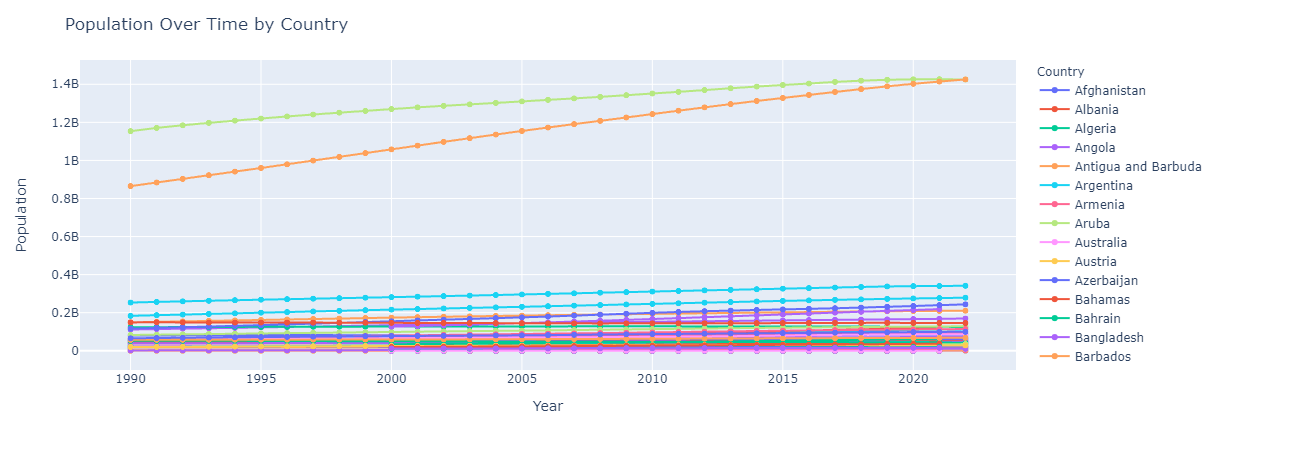

In [ ]:
import plotly.express as px

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

#warnings.filterwarnings("ignore", category=FutureWarning, module="plotly")
# Create an interactive line plot
fig = px.line(df, x='Year', y='Population', color='Country', markers=True)

# Update layout for better visualization
fig.update_layout(
    title='Population Over Time by Country',
    xaxis_title='Year',
    yaxis_title='Population',
    legend_title='Country'
)

# Show plot
fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



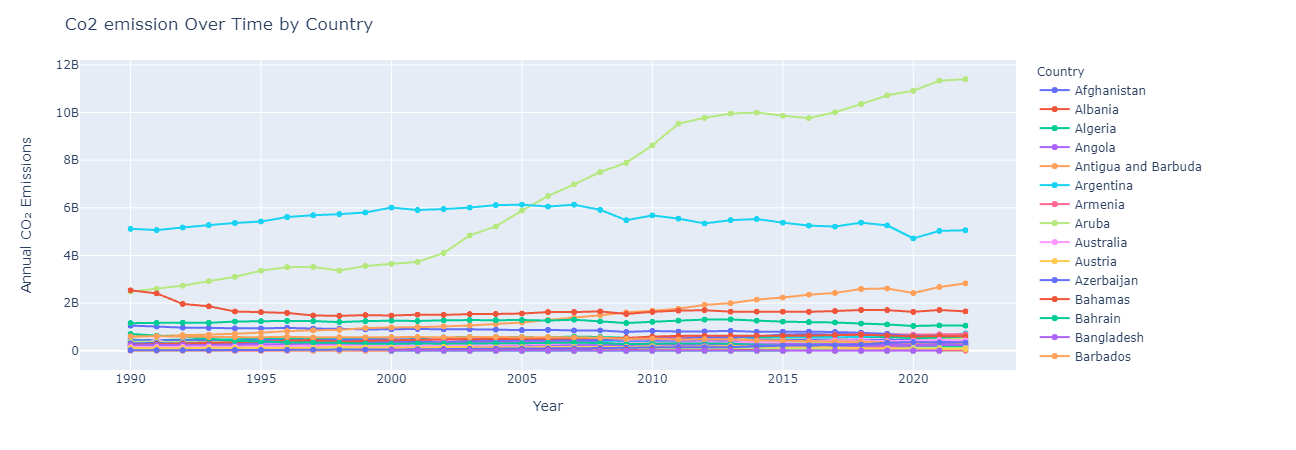

In [ ]:
import plotly.express as px

# Create an interactive line plot
fig = px.line(df, x='Year', y='Annual CO₂ emissions_y', color='Country', markers=True)

# Update layout for better visualization
fig.update_layout(
    title='Co2 emission Over Time by Country',
    xaxis_title='Year',
    yaxis_title='Annual CO₂ Emissions',
    legend_title='Country'
)

# Show plot
fig.show()


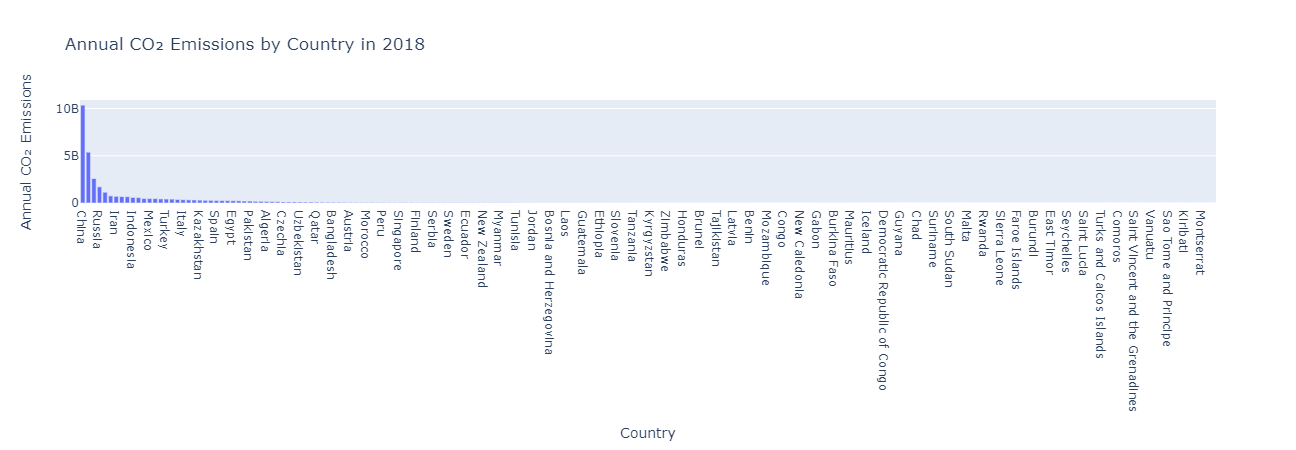

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



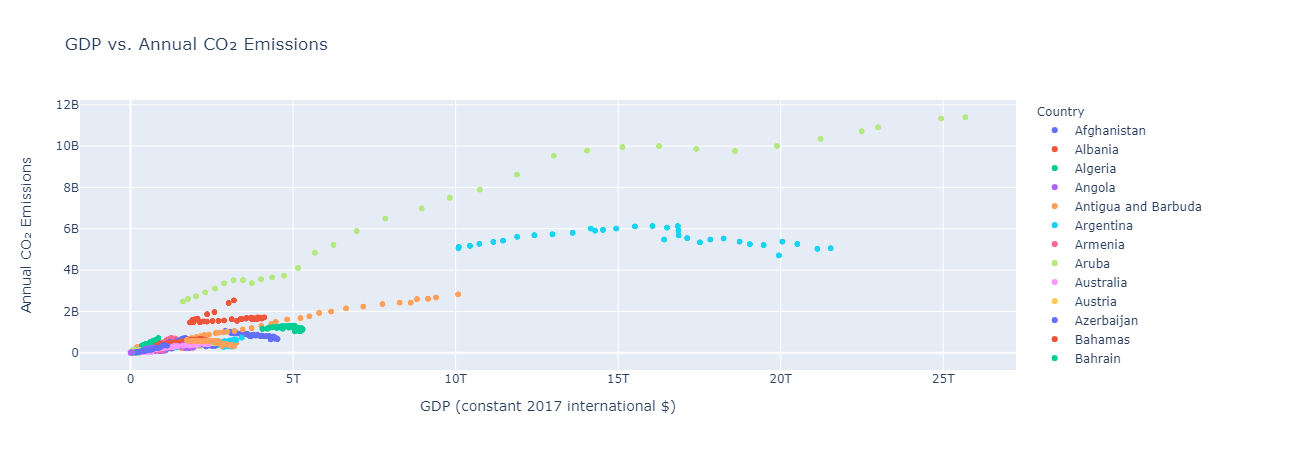

In [ ]:
import plotly.graph_objects as go

# Bar Chart for a specific year
year = 2018
df_year = df[df['Year'] == year]

fig_bar = px.bar(df_year, x='Country', y='Annual CO₂ emissions_y',
                 title=f'Annual CO₂ Emissions by Country in {year}',
                 labels={'Country': 'Country', 'Annual CO₂ emissions_y': 'Annual CO₂ Emissions'})
fig_bar.update_layout(xaxis={'categoryorder':'total descending'})
fig_bar.show()

# Scatter Plot
fig_scatter = px.scatter(df, x='GDP, PPP (constant 2017 international $)', y='Annual CO₂ emissions_y', color='Country',
                         title='GDP vs. Annual CO₂ Emissions',
                         labels={'GDP, PPP (constant 2017 international $)': 'GDP (constant 2017 international $)',
                                 'Annual CO₂ emissions_y': 'Annual CO₂ Emissions'})
fig_scatter.update_layout(legend_title_text='Country')
fig_scatter.show()



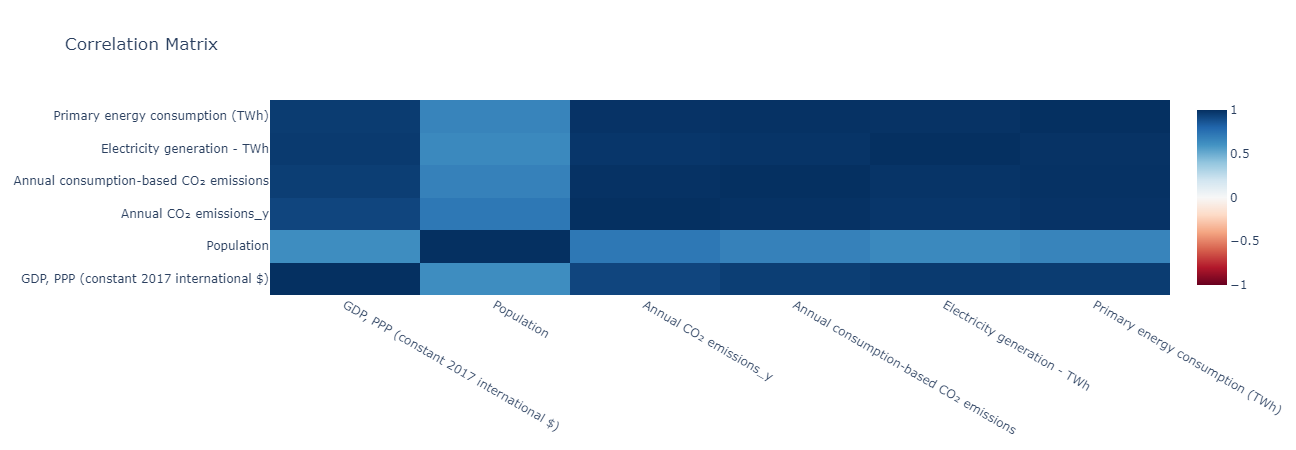

In [ ]:


# Select relevant columns for correlation
corr_df = df[['GDP, PPP (constant 2017 international $)', 'Population', 'Annual CO₂ emissions_y',
              'Annual consumption-based CO₂ emissions', 'Electricity generation - TWh',
              'Primary energy consumption (TWh)']]

# Calculate the correlation matrix
corr = corr_df.corr()

# Create a heatmap with a diverging color scale
fig_heatmap = go.Figure(data=go.Heatmap(
                   z=corr.values,
                   x=corr.columns,
                   y=corr.columns,
                   colorscale='RdBu',
                   zmid=0))  # zmid sets the midpoint of the diverging color scale to 0

# Update layout
fig_heatmap.update_layout(title='Correlation Matrix',
                          xaxis_nticks=36)

# Show the heatmap
fig_heatmap.show()


Mean Squared Error: 9240045809964660.0
R^2 Score: 0.9817042176454425
                                            Coefficient
GDP, PPP (constant 2017 international $)      -0.000110
Primary energy consumption (TWh)          258434.734044
Electricity generation - TWh              309722.545816


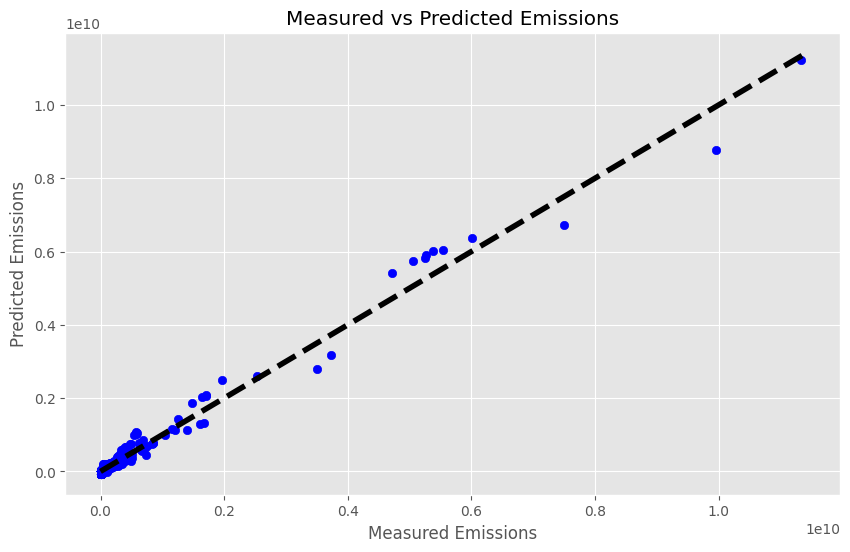

In [ ]:
X = df[['GDP, PPP (constant 2017 international $)', 'Primary energy consumption (TWh)', 'Electricity generation - TWh']]
y = df['Annual CO₂ emissions_y']

# Handle any missing values if necessary
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Coefficients of the regression model
coefficients = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured Emissions')
plt.ylabel('Predicted Emissions')
plt.title('Measured vs Predicted Emissions')
plt.show()

Predicted Reduction in Emissions: 18176776.451491162


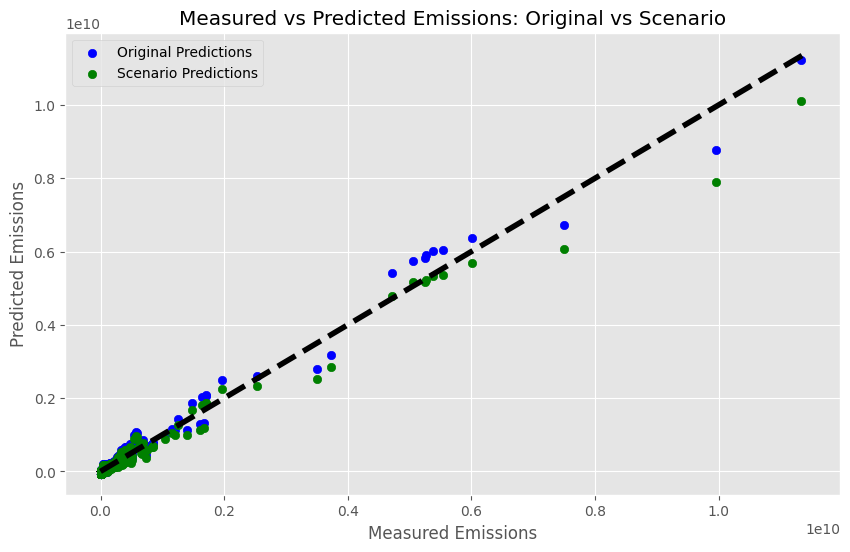

In [ ]:
# Scenario 1: Reducing primary energy consumption by 10%
X_scenario = X_test.copy()
X_scenario['Primary energy consumption (TWh)'] *= 0.9

# Predict emissions under the new scenario
y_scenario_pred = regressor.predict(X_scenario)

# Calculate the reduction in emissions
emission_reduction = np.mean(y_test - y_scenario_pred)
print(f'Predicted Reduction in Emissions: {emission_reduction}')

# Results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Original Predictions')
plt.scatter(y_test, y_scenario_pred, color='green', label='Scenario Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured Emissions')
plt.ylabel('Predicted Emissions')
plt.title('Measured vs Predicted Emissions: Original vs Scenario')
plt.legend()
plt.show()


Predicted Change in Emissions (Increase Renewable Energy): -5658943.55525462


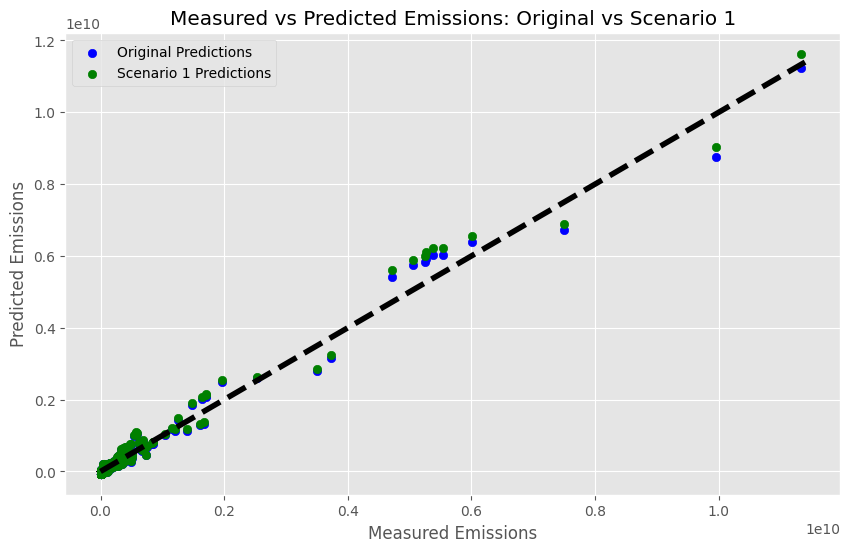

In [ ]:
# Scenario 2: Increasing Renewable Energy Generation by 15%
X_scenario1 = X_test.copy()
X_scenario1['Electricity generation - TWh'] *= 1.15

# Predict emissions under the new scenario
y_scenario1_pred = regressor.predict(X_scenario1)

# Calculate the reduction in emissions
emission_reduction1 = np.mean(y_test - y_scenario1_pred)
print(f'Predicted Change in Emissions (Increase Renewable Energy): {emission_reduction1}')

# Results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Original Predictions')
plt.scatter(y_test, y_scenario1_pred, color='green', label='Scenario 1 Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured Emissions')
plt.ylabel('Predicted Emissions')
plt.title('Measured vs Predicted Emissions: Original vs Scenario 1')
plt.legend()
plt.show()


Predicted Reduction in Emissions (Energy Efficiency): 36977264.033265576


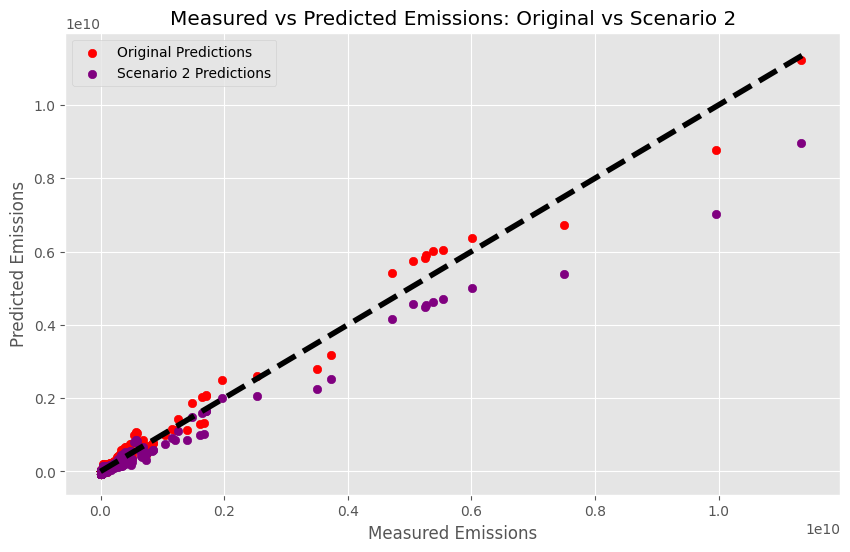

In [ ]:
# Scenario 3: Improving Energy Efficiency by 20%
X_scenario2 = X_test.copy()
X_scenario2['Primary energy consumption (TWh)'] *= 0.8

# Predict emissions under the new scenario
y_scenario2_pred = regressor.predict(X_scenario2)

# Calculate the reduction in emissions
emission_reduction2 = np.mean(y_test - y_scenario2_pred)
print(f'Predicted Reduction in Emissions (Energy Efficiency): {emission_reduction2}')

# Results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red', label='Original Predictions')
plt.scatter(y_test, y_scenario2_pred, color='purple', label='Scenario 2 Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured Emissions')
plt.ylabel('Predicted Emissions')
plt.title('Measured vs Predicted Emissions: Original vs Scenario 2')
plt.legend()
plt.show()


Predicted Change in Emissions (Increase GDP): 2471295.126865287


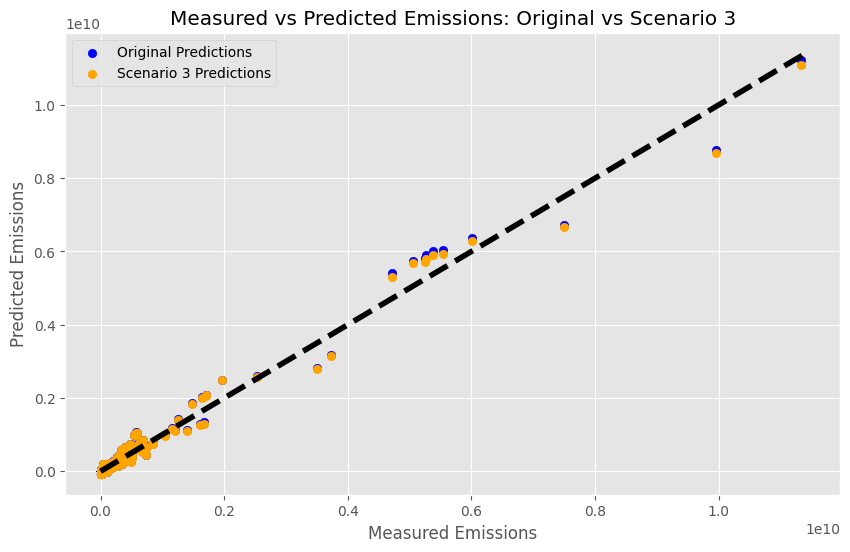

In [ ]:
# Scenario 4: Economic Growth Impact (Increasing GDP by 5%)
X_scenario3 = X_test.copy()
X_scenario3['GDP, PPP (constant 2017 international $)'] *= 1.05

# Predict emissions under the new scenario
y_scenario3_pred = regressor.predict(X_scenario3)

# Calculate the reduction in emissions
emission_reduction3 = np.mean(y_test - y_scenario3_pred)
print(f'Predicted Change in Emissions (Increase GDP): {emission_reduction3}')

# Results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Original Predictions')
plt.scatter(y_test, y_scenario3_pred, color='orange', label='Scenario 3 Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured Emissions')
plt.ylabel('Predicted Emissions')
plt.title('Measured vs Predicted Emissions: Original vs Scenario 3')
plt.legend()
plt.show()

In [ ]:
# Define the solutions and criteria for assessment
solutions = {
    'Improving Energy Efficiency': {
        'Technology Readiness': 'High',
        'Infrastructure Requirements': 'Medium',
        'Scalability': 'High',
        'Cost-Benefit': 'Positive',
        'Funding': 'Moderate',
        'Emission Reduction Potential': 'High',
        'Public Acceptance': 'High',
        'Regulatory Support': 'High'
    },
    'Renewable Energy Adoption': {
        'Technology Readiness': 'High',
        'Infrastructure Requirements': 'High',
        'Scalability': 'High',
        'Cost-Benefit': 'Positive',
        'Funding': 'High',
        'Emission Reduction Potential': 'High',
        'Public Acceptance': 'High',
        'Regulatory Support': 'Moderate'
    },
    'Carbon Capture and Storage (CCS)': {
        'Technology Readiness': 'Medium',
        'Infrastructure Requirements': 'High',
        'Scalability': 'Medium',
        'Cost-Benefit': 'Neutral',
        'Funding': 'High',
        'Emission Reduction Potential': 'Very High',
        'Public Acceptance': 'Moderate',
        'Regulatory Support': 'High'
    },
}

# Convert to DataFrame for better visualization
solutions_df = pd.DataFrame(solutions).T

print(solutions_df)


NameError: name 'pd' is not defined

In [ ]:
df.to_csv('/kaggle/working/output.csv', index=False)


NameError: name 'df' is not defined

In [ ]:


# Sample data (replace with your actual data)
data = {
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'feature3': np.random.rand(100),
    'target': np.random.rand(100)
}

df = pd.DataFrame(data)

# Split data into features and target
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(X.columns, rf_regressor.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

# Feature Importances
feature_importances = pd.DataFrame(rf_regressor.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importances)

# Prepare new data for prediction (use actual data in practice)
new_data = {
    'feature1': [0.5],
    'feature2': [0.6],
    'feature3': [0.7]
}

new_df = pd.DataFrame(new_data)

# Predict with new data
new_predictions = rf_regressor.predict(new_df)
print(f'Predictions for new data: {new_predictions}')


NameError: name 'pd' is not defined

In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # R-squared score

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r2}')


NameError: name 'y_test' is not defined